In [174]:
!pip install nvcc

ERROR: Could not find a version that satisfies the requirement nvcc (from versions: none)
ERROR: No matching distribution found for nvcc


In [175]:
!nvcc --version

'nvcc' is not recognized as an internal or external command,
operable program or batch file.


In [176]:
!pip install easyocr

In [177]:
!pip install imutils
!pip install opencv-python-headless--4.1.2.30
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

ERROR: Could not find a version that satisfies the requirement opencv-python-headless--4.1.2.30 (from versions: none)
ERROR: No matching distribution found for opencv-python-headless--4.1.2.30


Looking in indexes: https://download.pytorch.org/whl/cu117


In [235]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import imutils
import easyocr

In [236]:
img=cv2.imread("car_image.jpg")

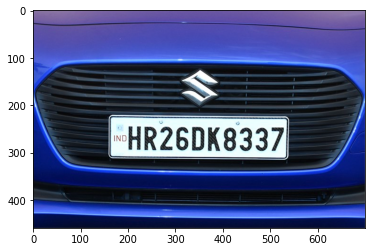

In [237]:
plt.imshow(img)

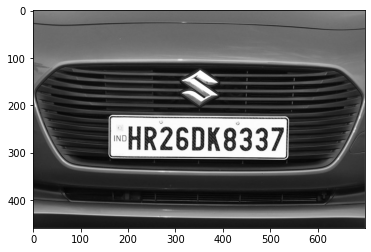

In [238]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))


In [239]:
# Apply filter and Edge detection

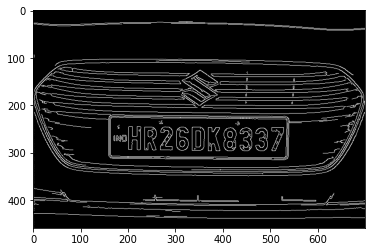

In [240]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Noise reduction
edged=cv2.Canny(bfilter,30,200) #edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [241]:
#find counters and apply mask

In [242]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [243]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        break

In [244]:
location

array([[[163, 229]],

       [[532, 229]],

       [[533, 307]],

       [[166, 307]]], dtype=int32)

In [245]:
mask= np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

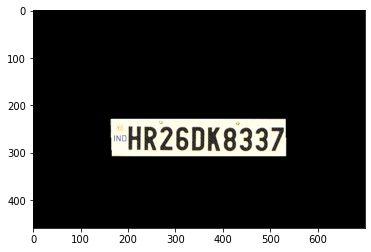

In [246]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [247]:
#(x,y)=np.where(mask==255)
#(x1,y1)=(np.min(x),np.max(y))
#(x2,y2)=(np.max(x),np.max(y))
#cropped_image=gray[x1:x2+1, y1:y2+2]

In [248]:
#plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [249]:
crop_image=new_image[230:310,200:530]

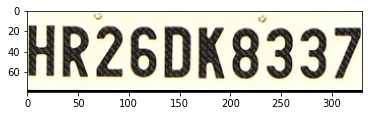

In [250]:
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

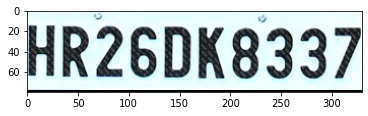

In [251]:
plt.imshow(crop_image)

In [252]:
# use easy OCR to read text

In [253]:
import easyocr

reader=easyocr.Reader(["en"])
result=reader.readtext(crop_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 2], [330, 2], [330, 77], [0, 77]], 'HRZGDK8337', 0.3920171998278869)]

In [254]:
result

[([[0, 2], [330, 2], [330, 77], [0, 77]], 'HRZGDK8337', 0.3920171998278869)]

In [255]:
#plot result

In [256]:
text=result[0][-2]
text

'HRZGDK8337'

In [257]:
detected_image = cv2.putText(
  img = img,
  text = text,
  org = (150, 350),
  fontFace = cv2.FONT_HERSHEY_SIMPLEX,
  fontScale =2,
  color = (125, 246, 55),
  thickness = 2
)
 
# Saving the new image
cv2.imwrite("car_image_detec.jpg", detected_image)


True

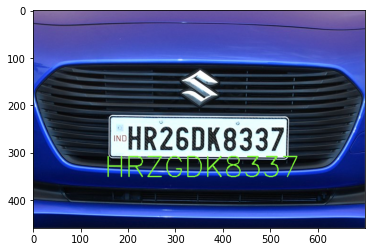

In [258]:
plt.imshow(img)